In [112]:
from datasets import load_dataset


dataset = load_dataset("un_pc", "en-zh")

Reusing dataset un_pc (/home/jia/.cache/huggingface/datasets/un_pc/en-zh/1.0.0/1360070a820db42f7427f5a98416dd3a1c956ae069b994bf2ec0b83ae16dcaee)


  0%|          | 0/1 [00:00<?, ?it/s]

In [113]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [114]:
dataset['train'][:5]['translation']

[{'en': 'RESOLUTION 918 (1994)', 'zh': '第918(1994)号决议'},
 {'en': 'Adopted by the Security Council at its 3377th meeting, on 17 May 1994',
  'zh': '1994年5月17日安全理事会第3377次会议通过'},
 {'en': 'The Security Council,', 'zh': '安全理事会，'},
 {'en': 'Reaffirming all its previous resolutions on the situation in Rwanda, in particular its resolution 872 (1993) of 5 October 1993 by which it established the United Nations Assistance Mission for Rwanda (UNAMIR), its resolution 909 (1994) of 5 April 1994 which extended the mandate of UNAMIR until 29 July 1994, and its resolution 912 (1994) of 21 April 1994 by which it adjusted the mandate of UNAMIR,',
  'zh': '重申其以往关于卢旺达局势的所有决议，特别是成立联合国卢旺达援助团(联卢援助团)的1993年10月5日第872(1993)号决议，延长联卢援助团任务期限至1994年7月29日的1994年4月5日第909(1994)号决议，以及调整联卢援助团的任务规定的1994年4月21日第912(1994)号决议，'},
 {'en': 'Recalling the statements made by the President of the Council on 7 April 1994 (S/PRST/1994/16) and 30 April 1994 (S/PRST/1994/21),',
  'zh': '回顾安理会主席以安理会名义在1994年4月7日发表的声明(S/PRST/ 1994/16)和在199

In [115]:
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-zh-en")

/home/jia/workspace/bigcode-project/hf_dev/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:198: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [124]:
sample = dataset['train'][53]['translation']
text_en = sample['en']
text = sample['zh']
tokenized_text = tokenizer.prepare_seq2seq_batch([text], return_tensors='pt')
translation = model.generate(**tokenized_text)
translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)[0]

In [125]:
score = jaccard_similarity(text_en.split(), translated_text.split())

In [126]:
print("Raw text in english:")
print(text_en)
print()
print("Raw text in chinese:")
print(text)
print()
print("Translated text in english:")
print(translated_text)
print()
print(f"similarity score {score}")

Raw text in english:
APPLICATIONS OF SPACE TECHNIQUES TO PREVENT AND COMBAT NATURAL DISASTERS, ORGANIZED IN COOPERATION

Raw text in chinese:
关于应用空间技术预防和对抗自然灾害讲习班报告

Translated text in english:
Report on the Workshop on Space Technology Applications for Natural Disaster Prevention and Response

similarity score 0.0


In [122]:
from tqdm import tqdm

In [64]:
all_scores = []
for sample in tqdm(dataset['train'].select(range(100))):
    text_en = sample['translation']['en']
    text = sample['translation']['zh']
    tokenized_text = tokenizer.prepare_seq2seq_batch([text], return_tensors='pt')
    translation = model.generate(**tokenized_text)
    translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)[0]
    score = jaccard_similarity(text_en.split(), translated_text.split())
    all_scores.append(score)

  0%|                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]/home/jia/workspace/bigcode-project/hf_dev/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3557: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatt

In [70]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/jia/workspace/bigcode-project/hf_dev/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['sample', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [71]:
all_scores[:10]

[0.5,
 1.0,
 1.0,
 0.9347826086956522,
 0.8888888888888888,
 0.9090909090909091,
 1.0,
 0.2926829268292683,
 0.9166666666666666,
 0.45714285714285713]

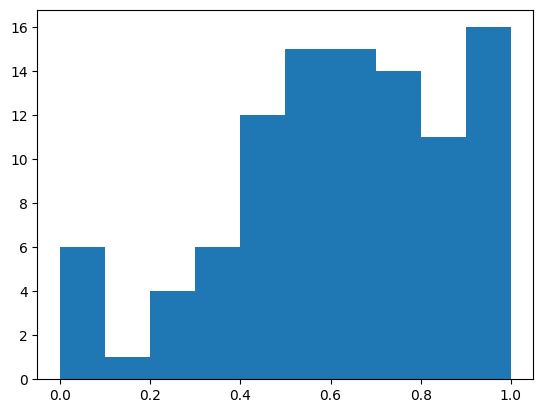

In [72]:
plt.hist(all_scores)

In [123]:
np.argsort(all_scores)

array([52, 53, 57, 21, 47, 60, 63, 66, 95,  7, 74, 98, 28, 10, 85, 65, 32,
       13, 69, 31, 58, 25, 24, 71, 12,  9, 83, 80, 86, 61,  0, 42, 81, 68,
       27, 48, 30, 77, 88, 41, 15, 84, 93, 59, 79, 90, 76, 16, 64, 22, 82,
       73, 99, 29, 26, 50, 40, 92, 72, 14, 91, 87, 62, 70, 96, 17, 45, 19,
       33, 44, 49, 39, 11, 67, 35, 89, 75, 97, 78, 43, 46, 34, 94,  4,  5,
       23,  8, 20,  3, 18, 38, 51, 56, 55,  2, 37,  1, 54, 36,  6])

In [104]:
class JaccardCalculator:
    
    def __init__(self, dataset):
        self.dataset = dataset
        self._scores = {}
    
    def compute(self, i, j):
        if (i, j) not in self._scores:
            sample_i = self.dataset[i]
            sample_j = self.dataset[j]
            
            text_en = sample_i['translation']['en']
            text = sample_j['translation']['zh']
            tokenized_text = tokenizer.prepare_seq2seq_batch([text], return_tensors='pt')
            translation = model.generate(**tokenized_text)
            translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)[0]
            self._scores[(i, j)] = jaccard_similarity(text_en.split(), translated_text.split())
        return self._scores[(i, j)]

    def best_voisin(self, i):
        start = max(i-5, 0)
        scores = []
        for k in range(start, i+5):
            scores.append(self.compute(i, k))
        return start + np.argsort(scores)[-1]

In [105]:
jc = JaccardCalculator(dataset['train'])

In [106]:
jc.compute(10, 9)

0.06521739130434782

In [108]:
predict_alignment = []
for i in tqdm(range(20)):
    predict_alignment.append(jc.best_voisin(i))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:15<00:00,  6.76s/it]


In [110]:
from sklearn import metrics

In [111]:
metrics.accuracy_score(np.array(predict_alignment), np.arange(20))

1.0